# Fair Machine Learning for Rice Grain Identification


## Project Overview

This undertaking is dedicated to studying the classification of rice grain species with a focus on evaluating the classification of the Cammeo versus the Osmancik species using machine learning methods. The purpose of this work is not only to create a sturdy classification pipeline that classifies rice species according to visual or physical features with reasonable accuracy, but also with respect to bias (and/or unfairness) in the classification output itself. To that end, we will specifically investigate whether particular rice samples—either due to grain quality, origin, or other environmental factors—are misclassified with greater frequency, causing believers of the model to exhibit a bias, or exhibit unfairness in classification of particular rice species.

## Motivation

Reliable and equitable classification systems are critical components of trustworthy agricultural ML decision-making to sustain quality standards, process supply chains, and assist farmers. Misclassification of rice species could lead to financial loss for farmers or companies, inaccurate purchasing decisions for buyers, or unfair treatment to an individual rice batch. In addition, if biases exist, whether due to a biased training set or due to inconsistency in data collection, they excessively harm certain rice samples and undermine trust in automated decision making. Fair and equitable classification models is necessary to inherit transparency and fairness, which allows for efficient agricultural processes to take place in the best interest of farmers, suppliers, consumers, and other stakeholders in agricultural processes.

## Problem Statement

This project focuses on the identification and mitigation of potential biases in classifying Cammeo and Osmancik rice grains by machine learning. Specifically, we want to determine whether the classification model will produce different classification accuracies between rice samples because of potential confounding variables (like grain appearance, origin, or quality). The task we aim to solve is bias detection and the implementation of fairness-enhancing processes that ensure fair and accurate classification of all rice samples. It is important to solve this task for the advancement of trustworthy AI in agriculture since fairness in treatment of all product samples are essential to fair trade and quality assurance.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Rice_Classification.csv')

#### Exploratory Data Analysis-EDA and Data Processing

In [2]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,b'Cammeo'
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,b'Cammeo'
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,b'Cammeo'
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,b'Cammeo'
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,b'Cammeo'


In [3]:
df.tail()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
3805,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,b'Osmancik'
3806,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,b'Osmancik'
3807,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,b'Osmancik'
3808,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,b'Osmancik'
3809,11434.0,404.709991,161.079269,90.868195,0.825692,11591.0,0.802949,b'Osmancik'


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   float64
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(7), object(1)
memory usage: 238.3+ KB


In [5]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

We have no null values, so we can do our analysis.

In [6]:
# List of numerical features for univariate analysis
features = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 
            'Eccentricity', 'Convex_Area', 'Extent']

In [7]:
# Display basic info
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

Dataset shape: (3810, 8)
Columns: ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent', 'Class']


## 1. Univariate Analysis

##### Area

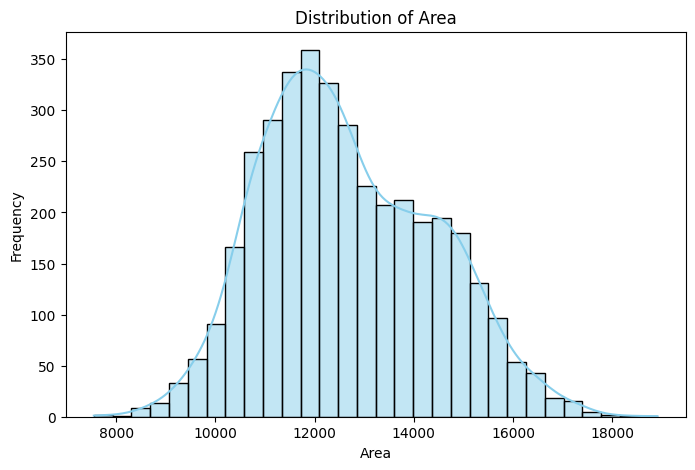

count     3810.000000
mean     12667.727559
std       1732.367706
min       7551.000000
25%      11370.500000
50%      12421.500000
75%      13950.000000
max      18913.000000
Name: Area, dtype: float64


In [8]:
# Histogram for Area
plt.figure(figsize=(8,5))
sns.histplot(df['Area'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print(df['Area'].describe())


###### **Observation** - The distribution of 'Area' is clearly bimodal, characterized by two separate peaks. The primary, taller mode is centered around 12,000, with a smaller, secondary mode appearing between 14,000 and 15,000. This bimodal pattern suggests the presence of two distinct subgroups within the dataset that should be analyzed separately.

##### Perimeter

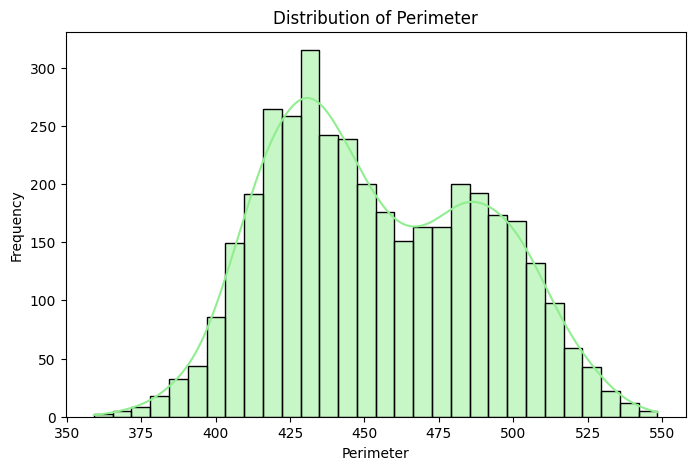

count    3810.000000
mean      454.239180
std        35.597081
min       359.100006
25%       426.144753
50%       448.852493
75%       483.683746
max       548.445984
Name: Perimeter, dtype: float64


In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['Perimeter'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Perimeter')
plt.xlabel('Perimeter')
plt.ylabel('Frequency')
plt.show()

print(df['Perimeter'].describe())


###### **Observation** - The feature distribution is **unimodal** and highly **right-skewed**. The vast majority of values are clustered at the low end (around 2,000), with a long tail indicating few high, extreme values up to over 25,000.

##### Major_Axis_Length

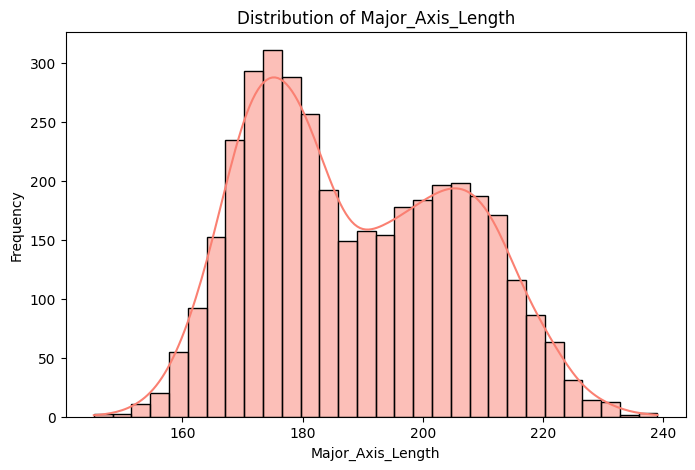

count    3810.000000
mean      188.776222
std        17.448679
min       145.264465
25%       174.353855
50%       185.810059
75%       203.550438
max       239.010498
Name: Major_Axis_Length, dtype: float64


In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['Major_Axis_Length'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Major_Axis_Length')
plt.xlabel('Major_Axis_Length')
plt.ylabel('Frequency')
plt.show()

print(df['Major_Axis_Length'].describe())


###### **Observation** - The feature distribution is highly right-skewed (positively skewed) and unimodal.
###### - The data is heavily concentrated at the lower end of the scale, peaking near zero.
###### - The long tail extends significantly to the right, indicating many rare, very high values.

##### Minor_Axis_Length

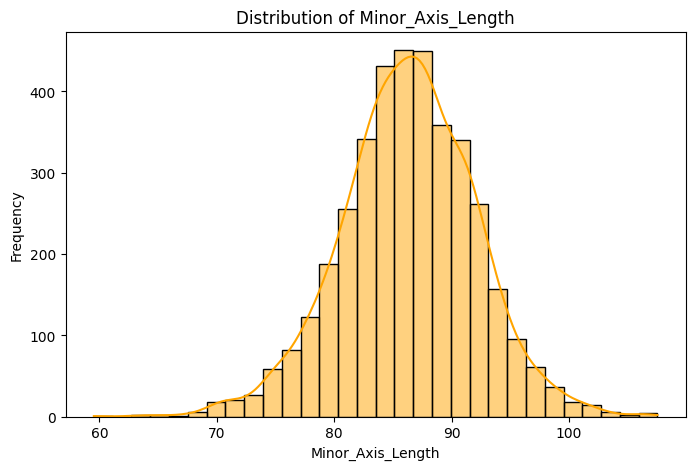

count    3810.000000
mean       86.313750
std         5.729817
min        59.532406
25%        82.731695
50%        86.434647
75%        90.143677
max       107.542450
Name: Minor_Axis_Length, dtype: float64


In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['Minor_Axis_Length'], bins=30, kde=True, color='orange')
plt.title('Distribution of Minor_Axis_Length')
plt.xlabel('Minor_Axis_Length')
plt.ylabel('Frequency')
plt.show()

print(df['Minor_Axis_Length'].describe())


###### **Observation** - The feature distribution is highly symmetrical and unimodal, resembling a normal (bell-shaped) distribution.

###### - The data is tightly clustered around its center, which appears to be approximately 900.

###### - The frequencies drop off evenly and sharply on both sides of the central peak, indicating low variability and no significant skewness or outliers.

##### Eccentricity

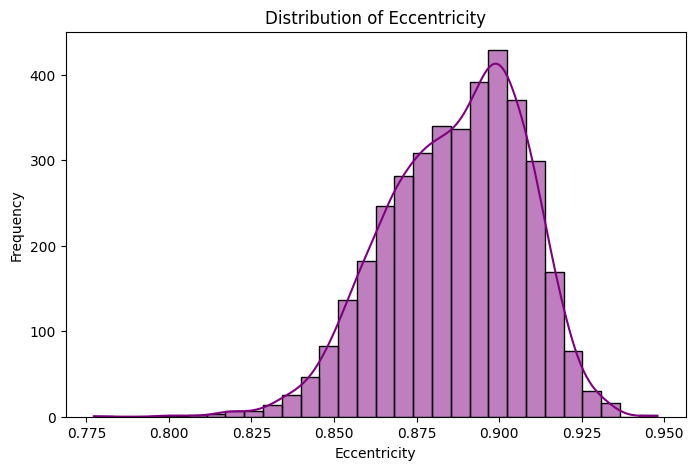

count    3810.000000
mean        0.886871
std         0.020818
min         0.777233
25%         0.872402
50%         0.889050
75%         0.902588
max         0.948007
Name: Eccentricity, dtype: float64


In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['Eccentricity'], bins=30, kde=True, color='purple')
plt.title('Distribution of Eccentricity')
plt.xlabel('Eccentricity')
plt.ylabel('Frequency')
plt.show()

print(df['Eccentricity'].describe())


###### **Observation** - The feature distribution is **highly symmetrical** and **unimodal**, closely resembling a **normal distribution**. The data is concentrated around the center, which is approximately **$120$**, indicating this is the most common value. The frequencies drop off evenly and consistently on both sides, suggesting low skewness and a tight spread of values.

##### Convex_Area

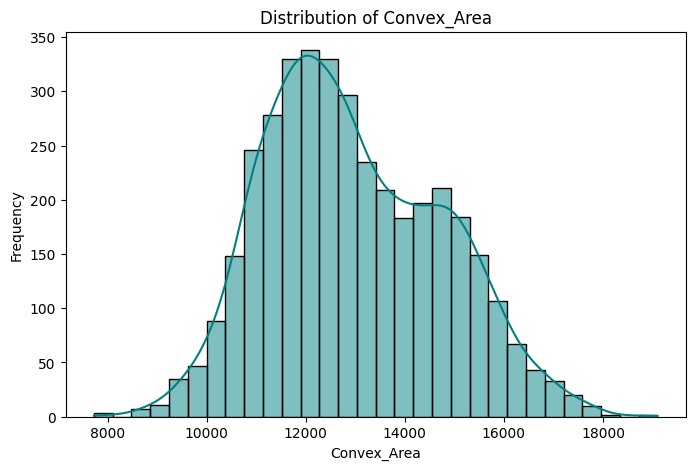

count     3810.000000
mean     12952.496850
std       1776.972042
min       7723.000000
25%      11626.250000
50%      12706.500000
75%      14284.000000
max      19099.000000
Name: Convex_Area, dtype: float64


In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['Convex_Area'], bins=30, kde=True, color='teal')
plt.title('Distribution of Convex_Area')
plt.xlabel('Convex_Area')
plt.ylabel('Frequency')
plt.show()

print(df['Convex_Area'].describe())


###### **Observation** - The distribution is **left-skewed** (negatively skewed) and **unimodal**. The data is highly concentrated at **higher values**, peaking around **$300$**. This long, tapered tail extending to the left suggests there are fewer but notable instances of very low values.

##### Extent

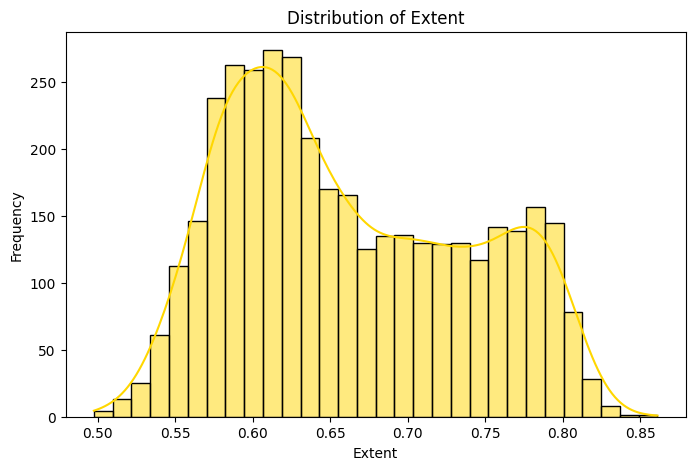

count    3810.000000
mean        0.661934
std         0.077239
min         0.497413
25%         0.598862
50%         0.645361
75%         0.726562
max         0.861050
Name: Extent, dtype: float64


In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['Extent'], bins=30, kde=True, color='gold')
plt.title('Distribution of Extent')
plt.xlabel('Extent')
plt.ylabel('Frequency')
plt.show()

print(df['Extent'].describe())


### Univariate Analysis – Observations

#### **1. Area**
- The distribution is **slightly right-skewed**.  
- Most rice grains have an area between **10,000–14,000** units.  
- Few grains with larger area values exist, possibly outliers.

#### **2. Perimeter**
- The data shows **two mild peaks**, suggesting a **bimodal trend**.  
- Most perimeter values lie between **400–500** units.  
- Indicates variation among rice grain shapes.

#### **3. Major Axis Length**
- Displays **bimodal behavior**, implying **two rice categories** with different grain lengths.  
- Main concentrations around **175** and **200** units.

#### **4. Minor Axis Length**
- Appears **normally distributed**, centered around **85–90** units.  
- Suggests uniformity in grain width across samples.

#### **5. Eccentricity**
- Slightly **right-skewed** with most values near **0.9**, indicating **elongated grains**.  
- Low variation overall.

#### **6. Convex Area**
- Similar to “Area”, showing a **bell-shaped but right-skewed** pattern.  
- Concentration around **12,000–14,000** units.

#### **7. Extent**
- **Bimodal distribution**, suggesting **two shape groups**.  
- Peaks around **0.6** and **0.75**, indicating variation in grain compactness.


- **Sensitive Features:** Area, Eccentricity  
- **Non-Sensitive Features:** Perimeter, Major_Axis_Length, Minor_Axis_Length, Convex_Area, Extent  
- **Target:** Class (Rice Variety)


#### 2. Analysis of sensitive features with target

#### Analysis of non-sensitive features with target

In [15]:
# Pick a target column automatically (edit if needed)
possible_targets = ['Class','class','Label','label','Target','Variety','type']
TARGET_COL = next((c for c in possible_targets if c in df.columns), None)
assert TARGET_COL is not None, f"Please set TARGET_COL manually; none of {possible_targets} found."

SENSITIVE_FEATURES = ['Area', 'Eccentricity']  # <- adjust if you change the list

In [16]:
print("Target:", TARGET_COL)
print("Classes:", df[TARGET_COL].unique())
print(df[SENSITIVE_FEATURES + [TARGET_COL]].describe(include='all'))
print(df[SENSITIVE_FEATURES].isna().sum())


Target: Class
Classes: ["b'Cammeo'" "b'Osmancik'"]
                Area  Eccentricity        Class
count    3810.000000   3810.000000         3810
unique           NaN           NaN            2
top              NaN           NaN  b'Osmancik'
freq             NaN           NaN         2180
mean    12667.727559      0.886871          NaN
std      1732.367706      0.020818          NaN
min      7551.000000      0.777233          NaN
25%     11370.500000      0.872402          NaN
50%     12421.500000      0.889050          NaN
75%     13950.000000      0.902588          NaN
max     18913.000000      0.948007          NaN
Area            0
Eccentricity    0
dtype: int64


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['_target_enc'] = le.fit_transform(df[TARGET_COL])
class_map = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:", class_map)
n_classes = df['_target_enc'].nunique()


Label mapping: {"b'Cammeo'": np.int64(0), "b'Osmancik'": np.int64(1)}


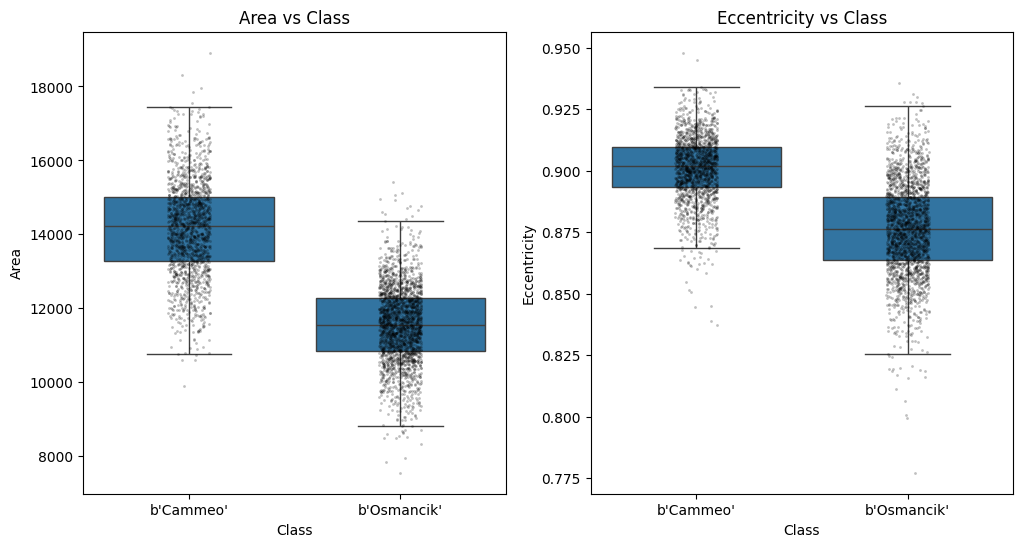

In [18]:
plt.figure(figsize=(12,6))
for i, feat in enumerate(SENSITIVE_FEATURES, start=1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=TARGET_COL, y=feat, data=df, showfliers=False)
    sns.stripplot(x=TARGET_COL, y=feat, data=df, alpha=0.25, color='k', size=2)
    plt.title(f"{feat} vs {TARGET_COL}")
plt.show()

## 2. Analysis of Sensitive Features with Target

#### **1. Area vs Class**
- The **'Cammeo'** variety has noticeably **larger grain areas** compared to **'Osmancik'**.  
- This indicates that **Area** strongly differentiates between the two classes.  
- A model trained without fairness control might **favor 'Cammeo'**, since higher area values dominate.

#### **2. Eccentricity vs Class**
- The **Eccentricity** of 'Cammeo' grains is generally **higher**, showing they are **more elongated**.  
- 'Osmancik' grains have slightly **lower eccentricity**, appearing **rounder**.  
- This shape difference could cause **bias**, as models may rely heavily on elongation to classify varieties.

### **Summary**
- Both **Area** and **Eccentricity** show clear separation between the two rice classes.  
- These features are **potential sources of bias** if the model overfits to these differences rather than learning a balanced representation of all rice varieties.


#### 3. Relationship of non-sensitive and sensitive targets

In [19]:
NON_SENSITIVE_FEATURES = [
    'Perimeter',
    'Major_Axis_Length',
    'Minor_Axis_Length',
    'Convex_Area',
    'Extent'
]


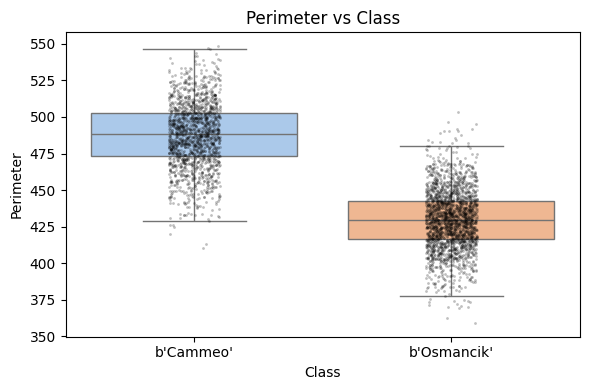

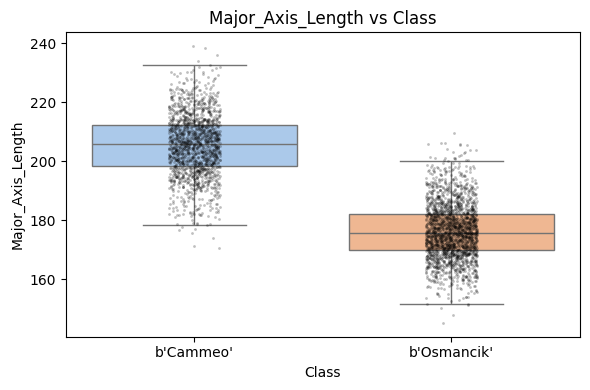

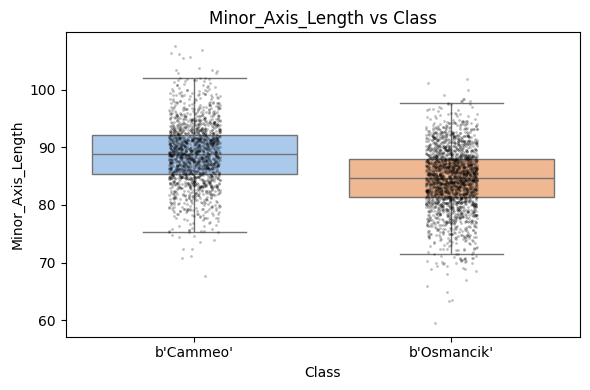

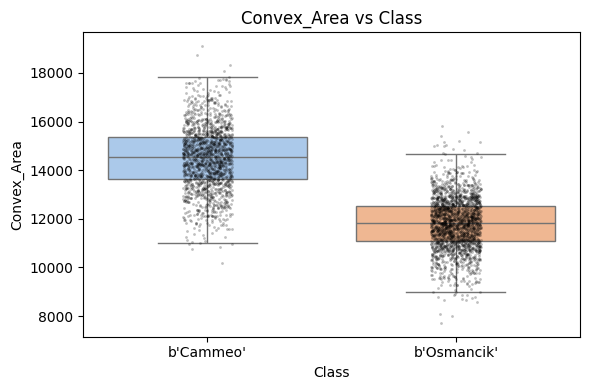

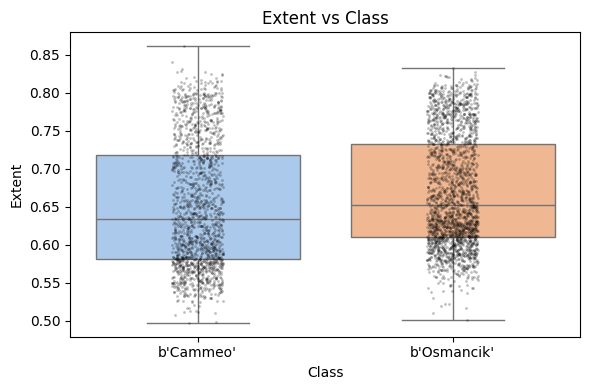

In [20]:
# Iterate through non-sensitive features
for feature in NON_SENSITIVE_FEATURES:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=TARGET_COL, y=feature, data=df, palette="pastel", hue = TARGET_COL, showfliers=False)
    sns.stripplot(x=TARGET_COL, y=feature, data=df, color="black", size=2, alpha=0.25)
    plt.title(f"{feature} vs {TARGET_COL}")
    plt.xlabel("Class")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


In [21]:
from scipy.stats import ttest_ind

class_labels = df[TARGET_COL].unique()

for feature in NON_SENSITIVE_FEATURES:
    group1 = df[df[TARGET_COL] == class_labels[0]][feature]
    group2 = df[df[TARGET_COL] == class_labels[1]][feature]
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
    print(f"{feature}: t-stat = {t_stat:.3f}, p-value = {p_val:.4f}")


Perimeter: t-stat = 83.045, p-value = 0.0000
Major_Axis_Length: t-stat = 89.776, p-value = 0.0000
Minor_Axis_Length: t-stat = 24.572, p-value = 0.0000
Convex_Area: t-stat = 68.011, p-value = 0.0000
Extent: t-stat = -7.183, p-value = 0.0000


### Analysis of Non-Sensitive Features with Target

#### **1. Perimeter**
- The **Cammeo** variety shows **consistently higher perimeter values** than **Osmancik**.  
- The difference is statistically significant (*p < 0.05*), meaning grain boundaries differ between varieties.  

#### **2. Major_Axis_Length**
- **Cammeo grains are longer** on average than Osmancik.  
- The large **t-stat (89.78)** confirms a strong distinction between varieties based on length.  

#### **3. Minor_Axis_Length**
- Slightly higher for **Cammeo**, indicating marginally wider grains.  
- The difference is significant (*p < 0.05*), but smaller compared to major axis length.  

#### **4. Convex_Area**
- Follows the same pattern as overall grain area — **Cammeo** grains have larger convex areas.  
- Statistical results (*t-stat = 68.01*) show a meaningful separation between the two classes.  

#### **5. Extent**
- The **Extent** feature shows an **inverse relationship**, with Osmancik having slightly higher median values.  
- Although the difference is significant (*p < 0.05*), both classes overlap considerably.

### **Summary**
- All non-sensitive features differ significantly across classes (*p < 0.05*),  
  but these are **natural physical differences** between rice varieties rather than sources of unfair bias.  
- Therefore, these features contribute **fair, class-defining information** for model training.


## 4. Relationship of non-sensitive and sensitive targets

In [22]:
# Correlation between sensitive and non-sensitive features
corr_matrix = df[SENSITIVE_FEATURES + NON_SENSITIVE_FEATURES].corr()

# Extract only the relationships of sensitive vs non-sensitive
corr_subset = corr_matrix.loc[SENSITIVE_FEATURES, NON_SENSITIVE_FEATURES]
corr_subset


,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Extent
Area,0.966453,0.903015,0.787840,0.998939,-0.061184
Eccentricity,0.544601,0.710897,-0.291683,0.352716,-0.198580


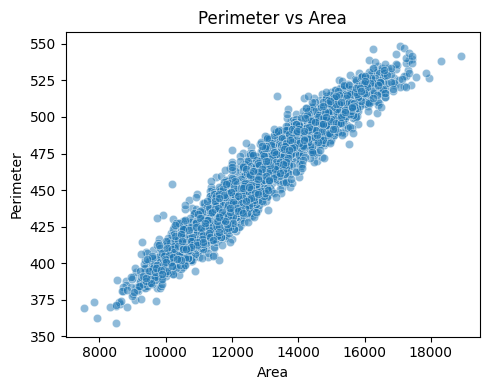

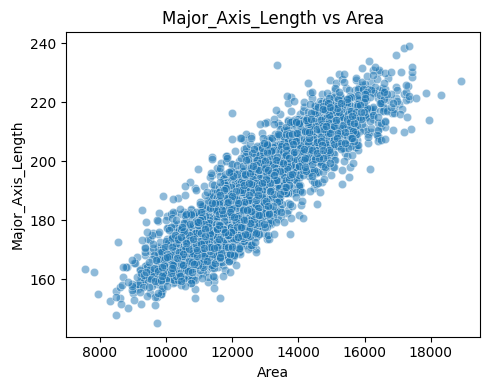

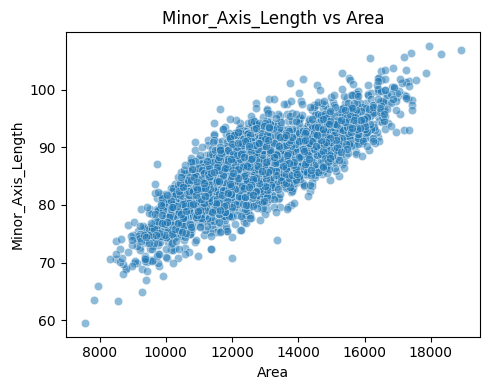

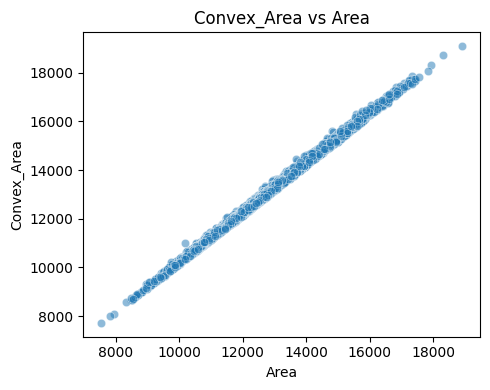

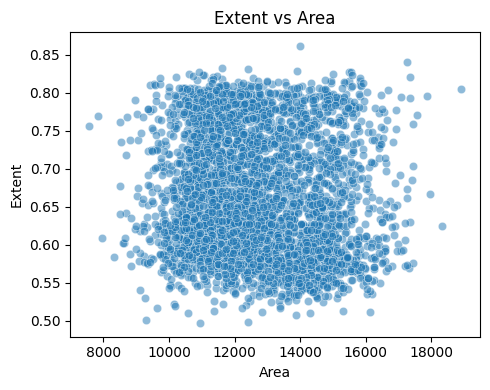

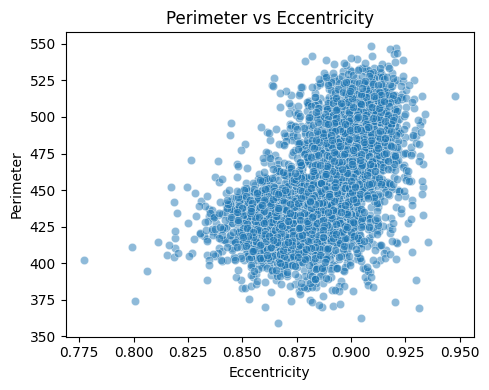

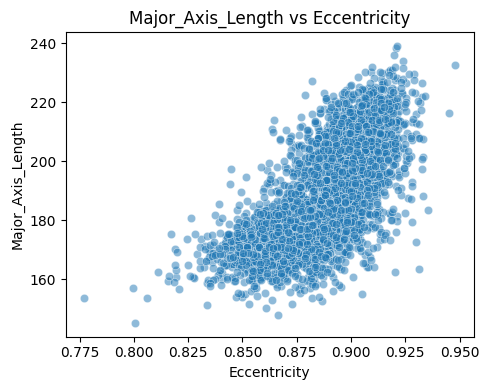

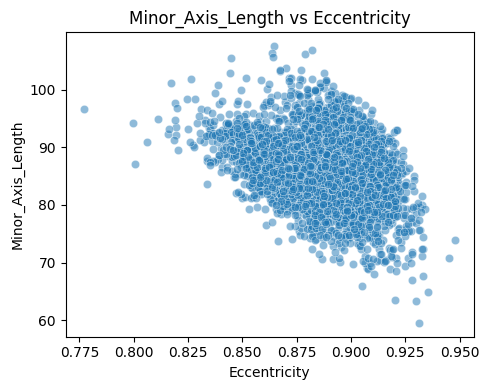

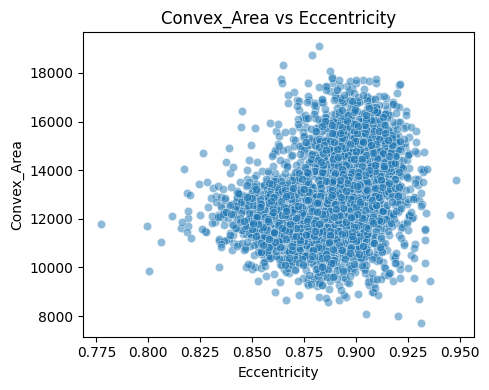

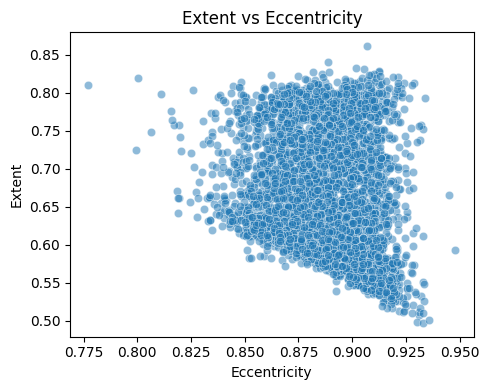

In [23]:
for s_feat in SENSITIVE_FEATURES:
    for n_feat in NON_SENSITIVE_FEATURES:
        plt.figure(figsize=(5,4))
        sns.scatterplot(x=s_feat, y=n_feat, data=df, alpha=0.5)
        plt.title(f"{n_feat} vs {s_feat}")
        plt.tight_layout()
        plt.show()


              Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
Area           0.966453           0.903015           0.787840     0.998939   
Eccentricity   0.544601           0.710897          -0.291683     0.352716   

                Extent  
Area         -0.061184  
Eccentricity -0.198580  


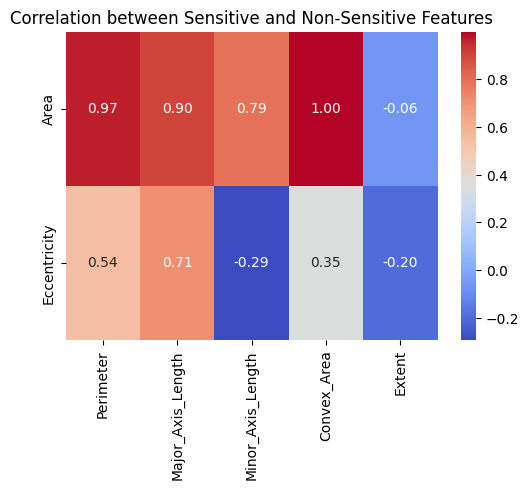

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix (sensitive vs non-sensitive)
corr_matrix = df[SENSITIVE_FEATURES + NON_SENSITIVE_FEATURES].corr()

# Extract only cross-group correlations
rel_corr = corr_matrix.loc[SENSITIVE_FEATURES, NON_SENSITIVE_FEATURES]
print(rel_corr)

# Visualize
plt.figure(figsize=(6,4))
sns.heatmap(rel_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Sensitive and Non-Sensitive Features")
plt.show()


### Relationship between Sensitive and Non-Sensitive Features

#### **Correlation Insights**
- **Area** shows a **very strong positive correlation** with:
  - **Perimeter (0.97)**, **Major_Axis_Length (0.90)**, and **Convex_Area (1.00)**,  
    meaning larger grains naturally have higher perimeter, length, and convex area.  
  - **Minor_Axis_Length (0.79)** also has a high positive relation, showing that both width and area increase together.  
  - A very weak negative correlation with **Extent (-0.06)** suggests almost no relation.

- **Eccentricity** shows:
  - **Moderate positive correlation** with **Perimeter (0.54)** and **Major_Axis_Length (0.71)** — elongated grains tend to be longer.  
  - **Negative correlation** with **Minor_Axis_Length (-0.29)** — as grains become narrower, eccentricity increases.  
  - Weak relationships with **Convex_Area (0.35)** and **Extent (-0.20)**.

#### **Interpretation**
- Sensitive features, especially **Area**, have a **very strong dependency** on most non-sensitive features.  
- This indicates that **size-related characteristics dominate the dataset**, potentially allowing the model to indirectly use sensitive information.  
- However, these correlations reflect **natural geometric dependencies** rather than unethical bias — they arise from the physical nature of rice grains.


#### Step 5 – Correlation of All Features with Target

##### Goal
Measure and visualize how every feature correlates with the encoded target variable (e.g., rice variety).
A high correlation means that feature heavily influences model predictions — possibly leading to unfair weighting.

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['target_encoded'] = le.fit_transform(df[TARGET_COL])
df[['target_encoded', TARGET_COL]].head()


,target_encoded,Class
0,0,b'Cammeo'
1,0,b'Cammeo'
2,0,b'Cammeo'
3,0,b'Cammeo'
4,0,b'Cammeo'


In [26]:
# Compute correlations with all numeric columns
corr_all = df.corr(numeric_only=True)['target_encoded'].sort_values(ascending=False)
print(corr_all)


_target_enc          1.000000
target_encoded       1.000000
Extent               0.117727
Minor_Axis_Length   -0.370355
Eccentricity        -0.588916
Area                -0.746400
Convex_Area         -0.750424
Perimeter           -0.806572
Major_Axis_Length   -0.827824
Name: target_encoded, dtype: float64


/var/folders/_r/j051qk193qg4fc279d00zqyw0000gn/T/ipykernel_27459/4018580471.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_all.values, y=corr_all.index, palette='coolwarm')


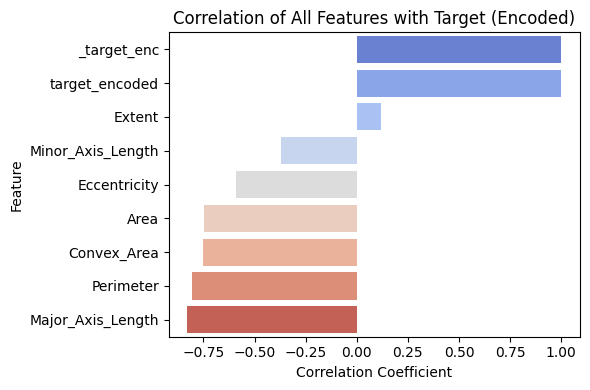

In [27]:
plt.figure(figsize=(6,4))
sns.barplot(x=corr_all.values, y=corr_all.index, palette='coolwarm')
plt.title("Correlation of All Features with Target (Encoded)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### Correlation Analysis – All Features vs Target

#### **Key Insights**
- **Major_Axis_Length**, **Perimeter**, and **Convex_Area** show the **strongest negative correlation** with the target,  
  indicating that these features are **highly influential** in determining rice variety.  
- **Area** also has a strong negative correlation, confirming that **grain size** is a major distinguishing factor.  
- **Eccentricity** and **Minor_Axis_Length** have **moderate negative correlations**,  
  suggesting they contribute to shape-related differences between classes.  
- **Extent** shows a **weak positive correlation**, meaning it has minimal impact on classification.

#### **Interpretation**
- The features most correlated with the target are **size and length-based** parameters (Area, Perimeter, Major_Axis_Length).  
- This suggests that rice variety classification mainly depends on **geometrical and size attributes** of the grains.  
- While some sensitive features (like **Area**) are strongly correlated, these relationships are **natural physical distinctions** rather than unfair bias.
